# Fertilizer Recommendation

#  Introduction

Welcome to the Fertilizer Recommendation System, a cutting-edge tool crafted to empower farmers and agricultural enthusiasts in making informed decisions regarding fertilizer selection. This system harnesses the power of extensive datasets containing crucial agricultural parameters, including soil nutrient levels, crop requirements, climate conditions, and geographical attributes.


In the realm of agriculture, the judicious application of fertilizers plays a pivotal role in optimizing crop productivity and ensuring soil health. Understanding the intricate dynamics between soil nutrients, crop demands, and environmental factors is paramount for achieving sustainable agricultural practices and maximizing yields.

Our Fertilizer Recommendation System integrates advanced algorithms and machine learning techniques to analyze soil composition, nutrient deficiencies, and crop preferences. By leveraging this comprehensive dataset, farmers can receive tailored recommendations that align with the specific needs of their crops and soil conditions.

## Importing Necessary Libraries

In [1]:
# NumPy for numerical operations and array manipulation
import numpy as np

# Pandas for data manipulation and analysis using data frames
import pandas as pd

# Matplotlib for creating visualizations in Python
import matplotlib.pyplot as plt 

# Seaborn for statistical data visualization based on Matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
import warnings

#for data preprocessing and feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Ignore sklearn warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Various classification models from scikit-learn for machine learning tasks
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Performance metrics such as accuracy_score,cross_val_score and classification_report from scikit-learn
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

# The pickle module for saving and loading machine learning models
import pickle


## DATA EXPLORATION

### LOADING DATA

In [2]:
fertilizer_recommendation_data = pd.read_csv("../data/raw/fertilizer_recommendation.csv")

### EXPLORING DATA

In [3]:
fertilizer_recommendation_data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
fertilizer_recommendation_data.tail()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP
98,29,58,57,Black,Sugarcane,12,0,10,20-20


In [5]:
fertilizer_recommendation_data.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [6]:
fertilizer_recommendation_data.size

891

In [7]:
fertilizer_recommendation_data.shape

(99, 9)

In [8]:
fertilizer_recommendation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [9]:
#changing the column names
fertilizer_recommendation_data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [10]:
fertilizer_recommendation_data.nunique()

Temparature    14
Humidity       13
Moisture       41
Soil_Type       5
Crop_Type      11
Nitrogen       24
Potassium      13
Phosphorous    32
Fertilizer      7
dtype: int64

In [11]:
fertilizer_recommendation_data.dtypes

Temparature     int64
Humidity        int64
Moisture        int64
Soil_Type      object
Crop_Type      object
Nitrogen        int64
Potassium       int64
Phosphorous     int64
Fertilizer     object
dtype: object

In [12]:
#checking for null values
fertilizer_recommendation_data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

## Data Preprocessing

In [13]:
missing_values = fertilizer_recommendation_data.isnull().sum()
missing_values

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In our dataset, there are no missing values, so there is no need to handle them.

### DATA TRANSFORMATION 

Convert Categorical Variables: Soil_Type, Crop_Type, or Fertilizer.
Encoding them using label encoding

In [14]:
label_encoders = {}

# Loop through categorical columns and perform label encoding
for column in fertilizer_recommendation_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    fertilizer_recommendation_data[column] = label_encoders[column].fit_transform(fertilizer_recommendation_data[column])

# Example of label encodings
print("Label Encodings:")
for column, encoder in label_encoders.items():
    print(f"{column}: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}")

# Now, your categorical variables are encoded numerically, and you can use them for model training

Label Encodings:
Soil_Type: {'Black': 0, 'Clayey': 1, 'Loamy': 2, 'Red': 3, 'Sandy': 4}
Crop_Type: {'Barley': 0, 'Cotton': 1, 'Ground Nuts': 2, 'Maize': 3, 'Millets': 4, 'Oil seeds': 5, 'Paddy': 6, 'Pulses': 7, 'Sugarcane': 8, 'Tobacco': 9, 'Wheat': 10}
Fertilizer: {'10-26-26': 0, '14-35-14': 1, '17-17-17': 2, '20-20': 3, '28-28': 4, 'DAP': 5, 'Urea': 6}


In [15]:
fertilizer_recommendation_data.head()

,Temparature,Humidity,Moisture,Soil_Type,Crop_Type,Nitrogen,Potassium,Phosphorous,Fertilizer
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


### Splitting Feature and Target Attributes

In [16]:
fertilizer_recommendation_features = fertilizer_recommendation_data.iloc[:, :-1] #feature attributes


fertilizer_recommendation_target = fertilizer_recommendation_data.iloc[:, -1].values.reshape(len(fertilizer_recommendation_data), 1) #target attribute

# Verify the shapes of the created data structures
print("Shape of DataFrame excluding last column:", fertilizer_recommendation_features.shape)
print("Shape of numpy array containing last column:", fertilizer_recommendation_target.shape)

Shape of DataFrame excluding last column: (99, 8)
Shape of numpy array containing last column: (99, 1)


### FEATURE ENGINEERING

#### FEATURE SCALING

Standard scaling, a preprocessing technique in machine learning, normalizes features by removing the mean and scaling to unit variance. This process ensures that features are on a comparable scale, preventing those with larger magnitudes from dominating the model's learning.

In [17]:
standard_scaler = StandardScaler()

# Perform Standardization (Z-score normalization)
fertilizer_recommendation_features = standard_scaler.fit_transform(fertilizer_recommendation_features)



In [18]:
fertilizer_recommendation_features.ndim

2

In [19]:
# Save the scaler using pickle
with open('../app/models/standard_scalerFR.pkl', 'wb') as file:
    pickle.dump(standard_scaler,file)

## DATA VISUALIZATION

Data visualization is a powerful tool for exploring, understanding, and communicating patterns and insights in your dataset

### EXPLORATORY DATA VISUALIZATION

Use pair plots, box plots, and Correlation Matrix to explore the distribution of individual variables and identify potential outliers or patterns.

Create pair plots to visualize relationships between pairs of variables and detect correlations.

Utilize heatmaps and correlation matrices to visualize the correlation structure between variables.

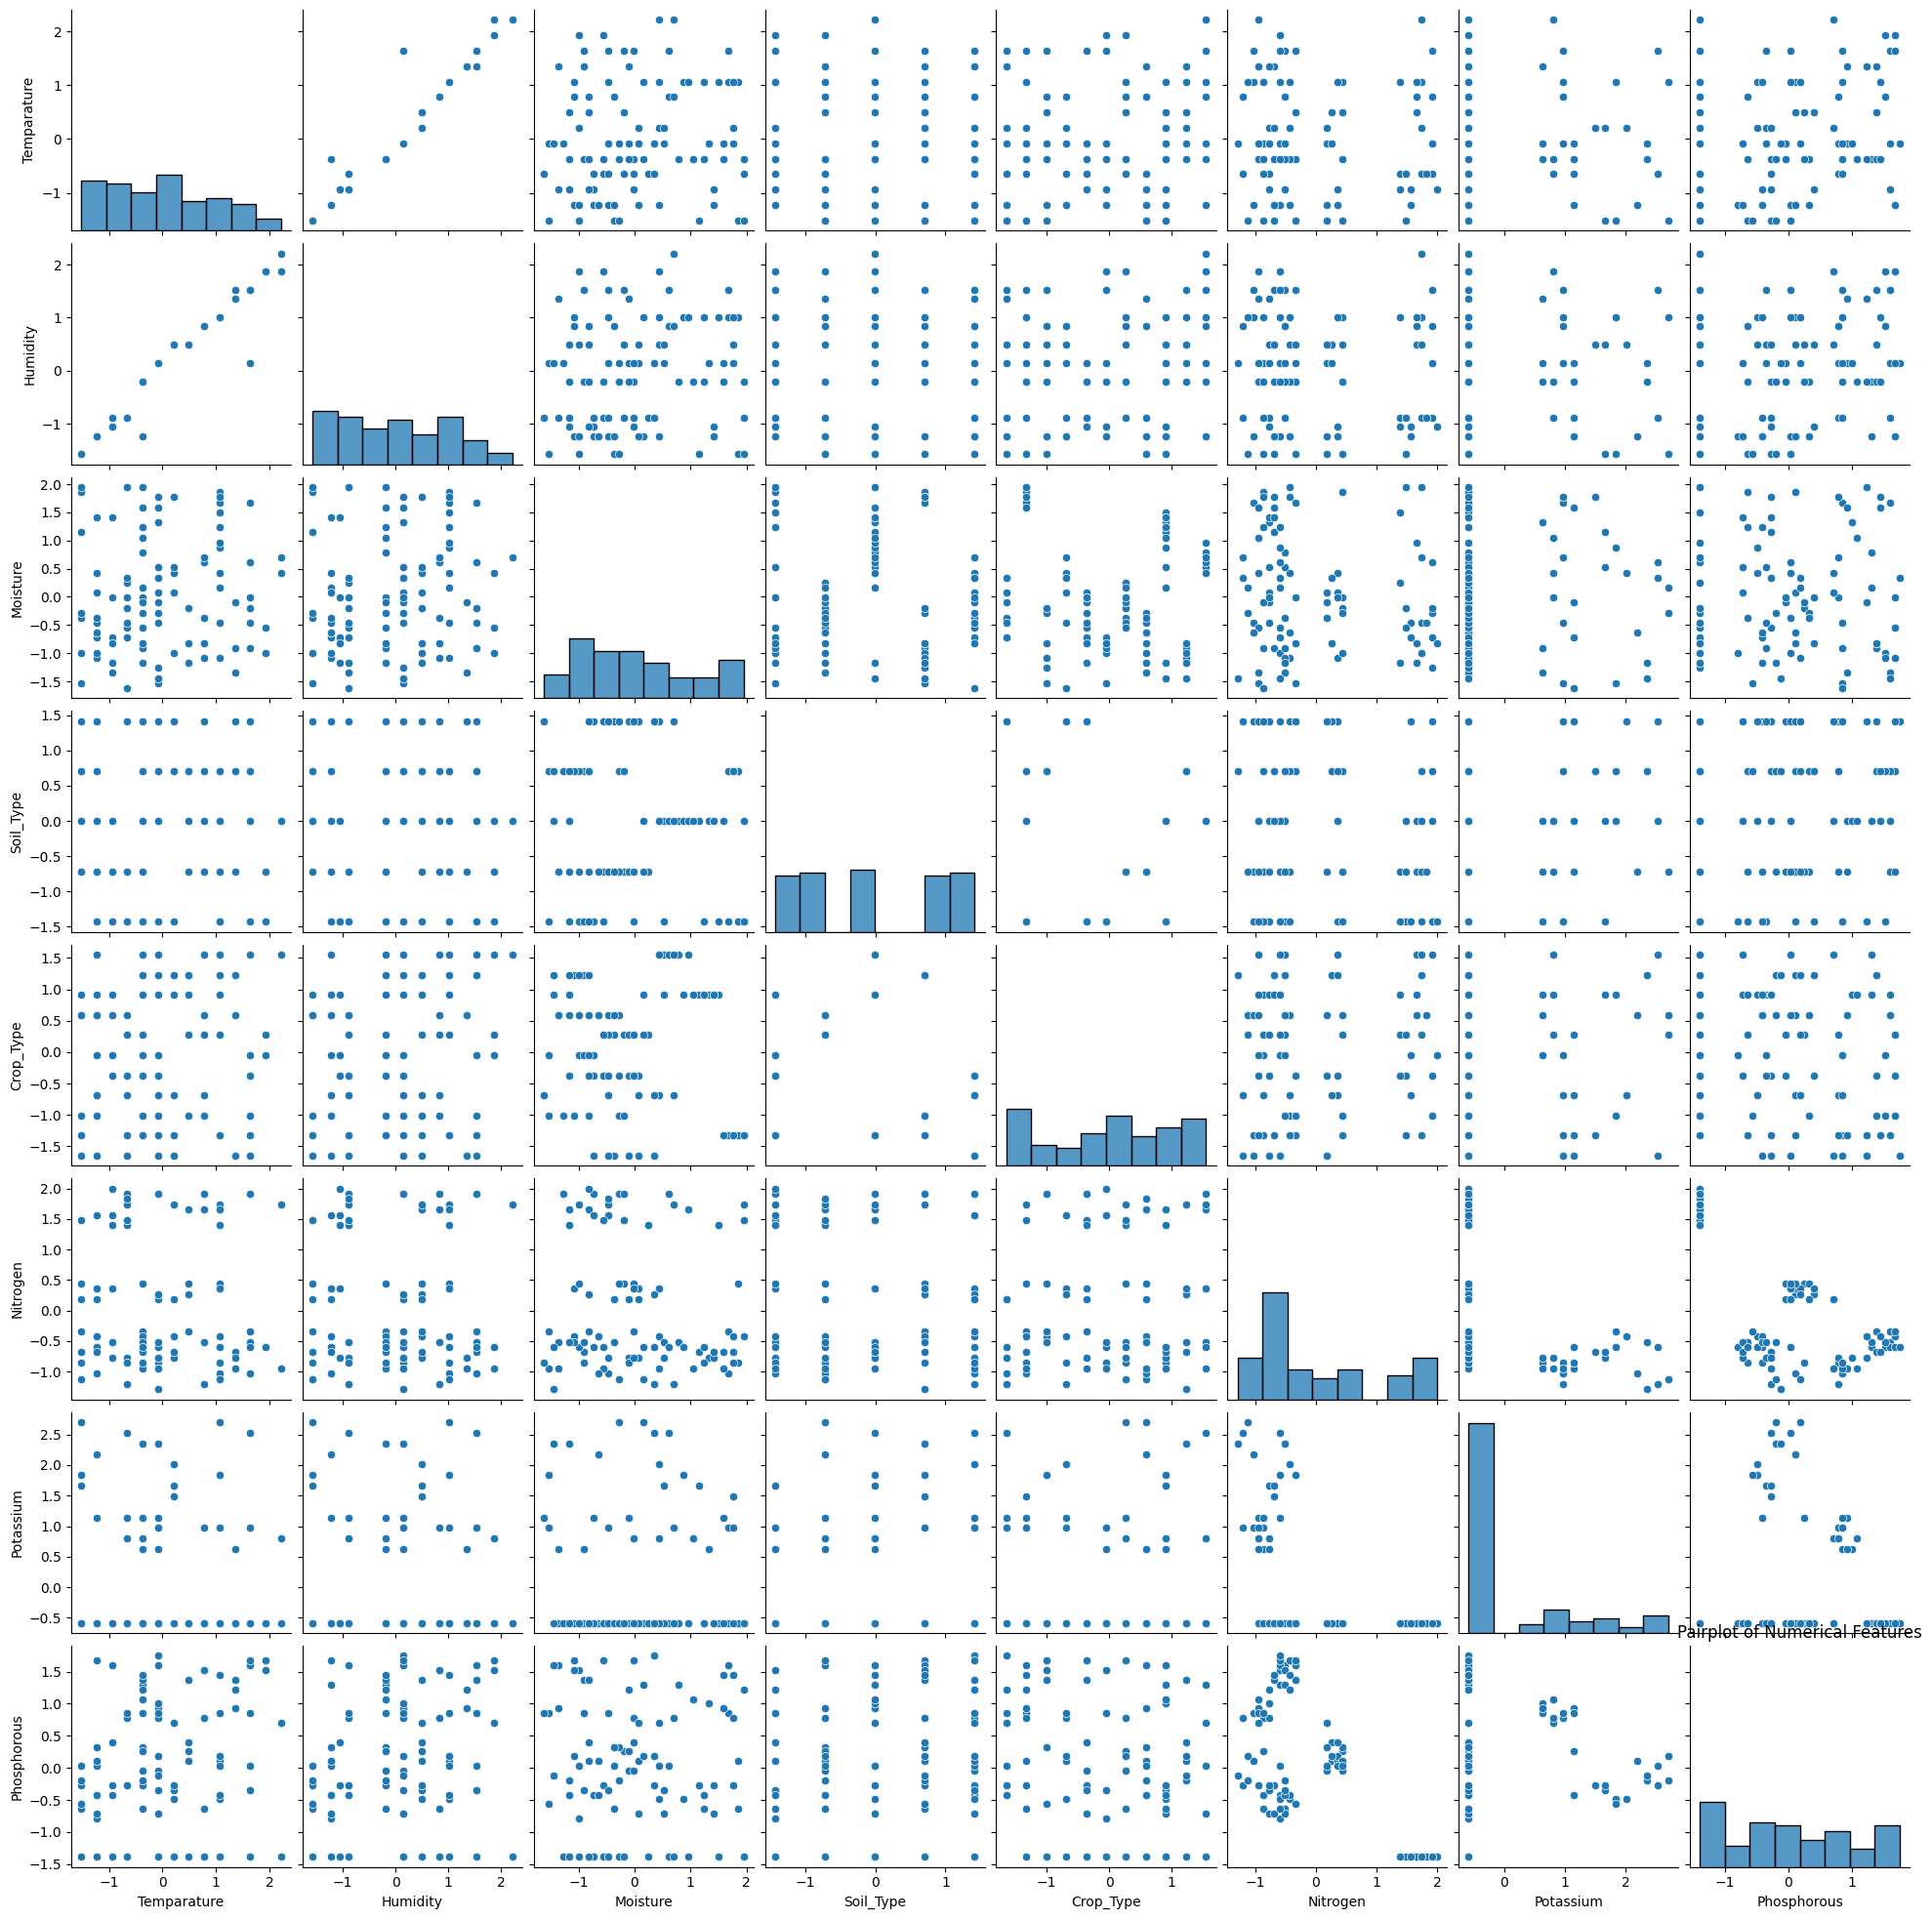

In [20]:
cols = ['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type', 'Nitrogen', 'Potassium', 'Phosphorous'] #for labelling
# Pairplot for numerical features
sns.pairplot(pd.DataFrame(fertilizer_recommendation_features,columns=cols))
plt.title('Pairplot of Numerical Features')
plt.show()

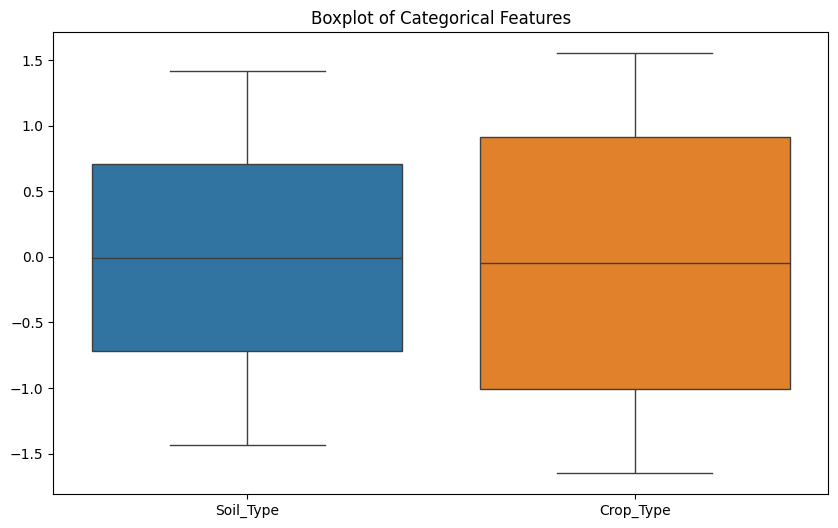

In [21]:
# Boxplot for categorical features

# Indices and labels
indices = [3, 4]
labels = ['Soil_Type', 'Crop_Type']

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=fertilizer_recommendation_features[:, indices])
plt.title('Boxplot of Categorical Features')
plt.xticks(range(len(indices)), labels)
plt.show()

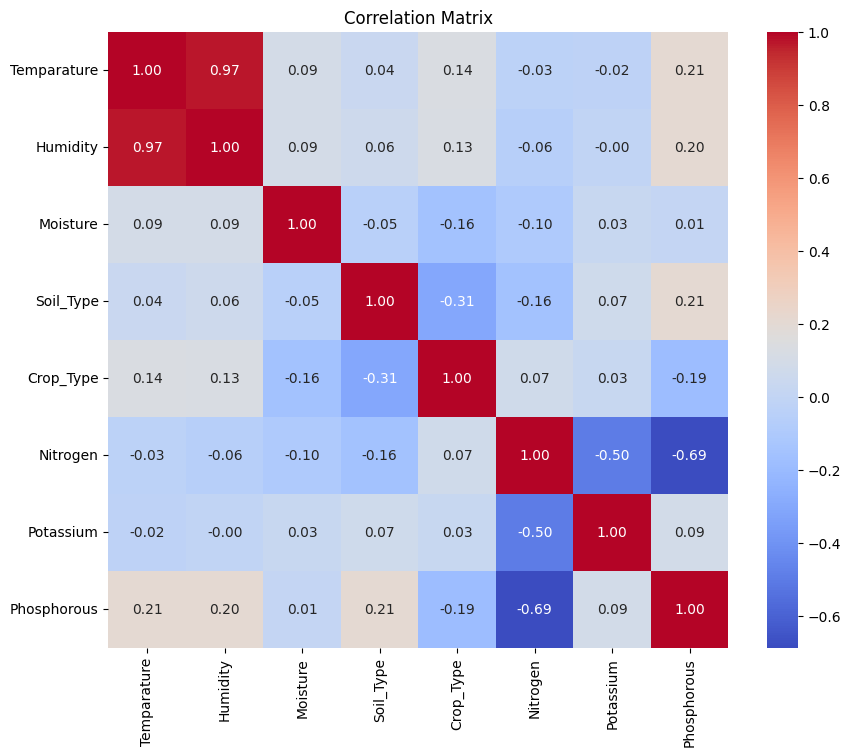

In [22]:
# Correlation heatmap

# Column labels
labels = ['Temparature', 'Humidity', 'Moisture', 'Soil_Type', 'Crop_Type', 'Nitrogen', 'Potassium', 'Phosphorous']

# Compute the correlation matrix
correlation_matrix = np.corrcoef(fertilizer_recommendation_features, rowvar=False)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.title('Correlation Matrix')
plt.show()

When the correlation coefficient between temperature and humidity is high, such as the observed value of 0.97 in 
correlation matrix, and the pair plot exhibits a clear diagonal slope from left to right, it indicates a strong positive linear
relationship between these two variables. 

Eventhough having higher correlation coefficient and interconnectedness between temperature and humidity, considering both values is necessary for greater accuracy. 

## MODEL TRAINING 

### SPLITTING DATA INTO TRAINING AND TESTING SET

In [23]:
# Separate features (X) and target variable (y)
X = fertilizer_recommendation_features  # feature StandardScaler numpy array
y = fertilizer_recommendation_target  # target value numpy array

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shape - X_test:", X_test.shape, "y_test:", y_test.shape)

Training set shape - X_train: (79, 8) y_train: (79, 1)
Testing set shape - X_test: (20, 8) y_test: (20, 1)


## MODEL BUILDING AND EVALUATION

### MODEL BUILDING

### LogisticRegression

In [24]:
# Create a Logistic Regression model
logistic_model = LogisticRegression(penalty='l2')  # L2 regularization

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_logistic = logistic_model.predict(X_test)

print("TESTING DATA:")
# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("\n Cross Validation Score:\n", cross_val_score(logistic_model, X_train, y_train, cv=5, scoring = "accuracy"))

TESTING DATA:
Logistic Regression Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.60      0.75         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.95      0.93      0.93        20
weighted avg       0.93      0.90      0.90        20


 Cross Validation Score:
 [0.9375 0.8125 1.     0.9375 1.    ]


#### 6.2 DecisionTree Classifier

In [25]:
# Create a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(max_depth=5,min_samples_split=5, min_samples_leaf=2) # Limit tree depth to avoid overfitting and min splits and leaves for better model

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_dt = dt_model.predict(X_test)

print("TESTING DATA:")
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\n Cross Validation Score:\n", cross_val_score(dt_model, X_train, y_train, cv=5, scoring = "accuracy"))

TESTING DATA:
Decision Tree Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.71      0.71      0.71        20
weighted avg       0.90      0.90      0.90        20


 Cross Validation Score:
 [0.9375     0.9375     0.9375     0.875      0.93333333]


#### 6.3 RandomForest Classifier

In [26]:
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=4, max_features='sqrt') # feature split at each de

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_model.predict(X_test)

print("TESTING DATA:")
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


print("\n Cross Validation Score:\n", cross_val_score(rf_model, X_train, y_train, cv=5, scoring = "accuracy"))

TESTING DATA:
Random Forest Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20


 Cross Validation Score:
 [0.875      0.9375     0.9375     0.9375     0.93333333]


#### 6.4 SupportVectorMachine

In [27]:
# Create an SVM classifier model
svm_model = SVC(kernel='rbf', C=1.0, gamma="scale")  # You can adjust kernel, C, and gamma parameters as needed

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_svm = svm_model.predict(X_test)

print("TESTING DATA:")
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\n Cross Validation Score:\n", cross_val_score(rf_model, X_train, y_train, cv=5, scoring = "accuracy"))

TESTING DATA:
SVM Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       0.50      1.00      0.67         1
           4       1.00      0.60      0.75         5
           5       0.71      1.00      0.83         5
           6       1.00      0.83      0.91         6

    accuracy                           0.80        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.90      0.80      0.82        20


 Cross Validation Score:
 [0.9375     0.875      0.9375     0.9375     0.93333333]


### 6.5 Ridge Classifier along with L2 Regularization

In [28]:
# Apply Ridge Classifier with regularization parameter alpha=0.1
rc_model = RidgeClassifier(alpha=0.4)

# Fit the model to the training data
rc_model.fit(X_train, y_train)

# Predict on the testing data
y_pred_rc = rc_model.predict(X_test)

print("TESTING DATA:")
# Evaluate the model
accuracy_rc = accuracy_score(y_test, y_pred_rc)
print("Ridge Classifier Accuracy:", accuracy_rc)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rc))

print("\n Cross Validation Score:\n", cross_val_score(rf_model, X_train, y_train, cv=5, scoring = "accuracy"))

TESTING DATA:
Ridge Classifier Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.20      0.33         5
           5       0.62      1.00      0.77         5
           6       0.75      1.00      0.86         6

    accuracy                           0.65        20
   macro avg       0.56      0.53      0.49        20
weighted avg       0.68      0.65      0.58        20


 Cross Validation Score:
 [0.9375     0.8125     0.9375     0.9375     0.93333333]


### 6.6 Gradient Boosting

In [29]:
#creating gradient boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.01,  
    max_depth=3,  
    min_samples_split=20,  
    min_samples_leaf=10,  
    subsample=0.8,  
    random_state=42
)

# Use early stopping with validation data to prevent overfitting
gb_model.fit(X_train, y_train)


# Predict on the testing data
y_pred_gb = gb_model.predict(X_test)

print("TESTING DATA:")
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Perform cross-validation to check for overfitting
cross_val_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

print("\n Cross Validation Score:\n", cross_val_score(gb_model, X_train, y_train, cv=5, scoring = "accuracy"))


TESTING DATA:
Gradient Boosting Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


 Cross Validation Score:
 [1.         0.8125     1.         0.875      0.93333333]


On evaluation of cross validation scores of each model we can conclude that the models used LogisticRegression, DecisionTree,
RandomForest, SupportVectorMachine, RidgeClassifierRegularization, GradientBoosting are well fitted and has their accuracy good.
Among all Gradient Boosting has accuracy rate 1.0. Hence we choose Gradient Boosting model for fertilizer recommendations.

### 6.2 MODEL EVALUATION

#### 6.2.1 MODEL PERFORMANCES

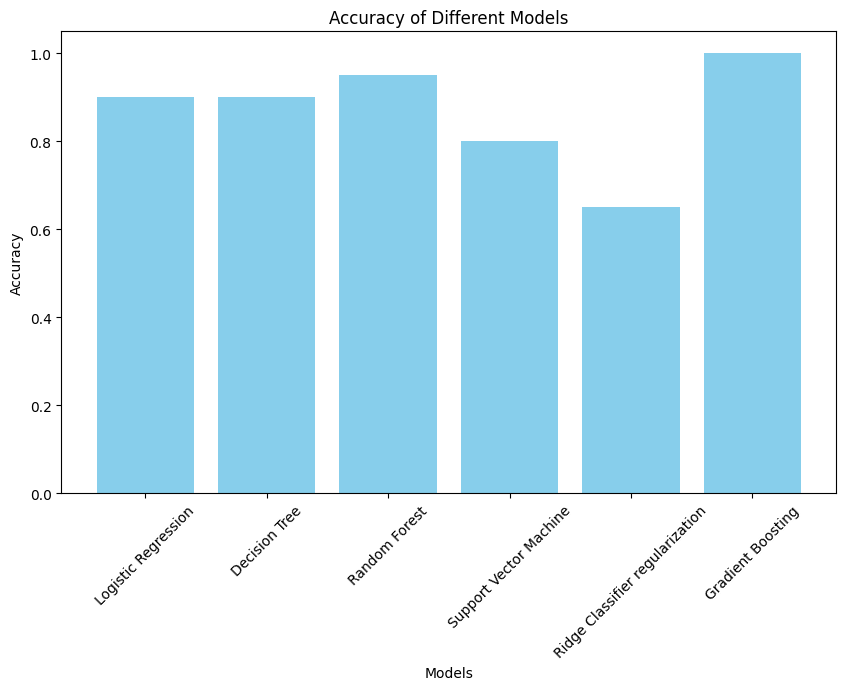

In [30]:
# Model names and their accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Ridge Classifier regularization','Gradient Boosting']
accuracies = [accuracy_logistic, accuracy_dt, accuracy_rf, accuracy_svm,accuracy_rc,accuracy_gb]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')

# Add title and labels
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

Among all Gradient Boosting has accuracy rate 1.0. Hence we choose Gradient Boosting model for fertilizer recommendations.

In [31]:
# #saving the decision tree classifier model
with open('../app/models/fertilizer_recommendation.pkl', 'wb') as file:
    pickle.dump(gb_model , file)

#### 6.2.2 PREDICTION FOR A NEW VALUE

In [32]:
#FUNCTION to convert categorical values of input_data to numerical values
def catergorical_to_num(input_data):
    numerical_values = input_data

    # Load the label encoders for Soil_Type and Crop_Type
    soil_type_encoder = LabelEncoder()
    soil_type_encoder.classes_ = np.array(['Black', 'Clayey', 'Loamy', 'Red', 'Sandy'])

    crop_type_encoder = LabelEncoder()
    crop_type_encoder.classes_ = np.array(['Barley', 'Cotton', 'Ground Nuts', 'Maize', 'Millets', 'Oil seeds', 'Paddy', 'Pulses', 'Sugarcane', 'Tobacco', 'Wheat'])

    # Encode the categorical values
    soil_type_encoded = soil_type_encoder.transform([input_data[3]])[0]
    crop_type_encoded = crop_type_encoder.transform([input_data[4]])[0]

    # Combine numerical and encoded values
    encoded_data = input_data[:3] + [soil_type_encoded, crop_type_encoded] + list(map(int, input_data[-3:]))
    return encoded_data

In [33]:
# Loading Standard_Scaler
with open('../app/models/standard_scalerFR.pkl', 'rb') as file:
    scaler = pickle.load(file)


# Loading the Random Forest Model
with open('../app/models/fertilizer_recommendation.pkl', 'rb') as file:
    model_loaded = pickle.load(file)
input_data=[26,52,38,'Sandy','Maize',37,0,0]
new_data = [catergorical_to_num(input_data)]

# Applying Standar_Scaling to new data
scaled_data = scaler.transform(new_data)  # Use transform, not fit_transform

# Predicting for new value with the loaded model
prediction = model_loaded.predict(scaled_data)

# Print the prediction
print("Predicted Crop:", prediction)


Predicted Crop: [6]


In [34]:
# Reversing dictionary of label encodings

reverse_fertilizer = {0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}
predicted_fertilizer = [reverse_fertilizer[prediction[0]]]

In [35]:
print("Predicted Fertilizer: "+predicted_fertilizer[0])

Predicted Fertilizer: Urea


## 7. Conclusion 

In this notebook, we explored the task of fertilizer recommendation using machine learning. We started by analyzing the dataset, preprocessing the data, and then training various models to predict the recommended fertilizer based on given features.

#### Best Model

After evaluating several models, the Gradient Boosting demonstrated superior performance interms of accuracy.

#### Recommendations

Our recommendation for deploying a fertilizer recommendation system is to utilize the Gradient Boosting model. This model exhibited robust performance during our analysis and can provide reliable predictions for fertilizer recommendations.
